# Exploring Relationships with Visualizations

1. Import Libraries
2. Import Data
3. Exploring relationships
    - Correlations
        - Heatmap
        - Scatterplot
        - Pairplot
        - Categorical plot
4. Questions Addressed
5. Possible Hypotheses

# 1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

# 2 Import Data

In [2]:
path = r'C:\Users\benar\CareerFoundry\01-2024 IMDB Movies Analysis'

In [3]:
df_mov = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'Movies_clean.csv'))

In [4]:
df_mov.head()

,name,rating,genre,year,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98


In [5]:
df_mov.shape

(7667, 14)

In [6]:
df_mov.dtypes

name         object
rating       object
genre        object
year          int64
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime       int64
dtype: object

# 3 Exploring Relationships

## Correlations

In [7]:
# Subset created to exclude non-numeric variables
sub = df_mov[['score', 'votes', 'budget', 'gross', 'runtime']]

In [8]:
sub

,score,votes,budget,gross,runtime
0,8.4,927000,19000000.0,46998772.0,146
1,5.8,65000,4500000.0,58853106.0,104
2,8.7,1200000,18000000.0,538375067.0,124
3,7.7,221000,3500000.0,83453539.0,88
4,7.3,108000,6000000.0,39846344.0,98
...,...,...,...,...,...
7662,3.1,18,7000.0,NaN,90
7663,4.7,36,NaN,NaN,90
7664,5.7,29,58750.0,NaN,110
7665,8.4,9,15000.0,NaN,120


In [9]:
# Correlation table
sub.corr()

,score,votes,budget,gross,runtime
score,1.000000,0.408829,0.075449,0.186172,0.399675
votes,0.408829,1.000000,0.442200,0.630750,0.309053
budget,0.075449,0.442200,1.000000,0.739954,0.319931
gross,0.186172,0.630750,0.739954,1.000000,0.245156
runtime,0.399675,0.309053,0.319931,0.245156,1.000000


Text(0.5, 1.0, 'Correlation Heatmap')

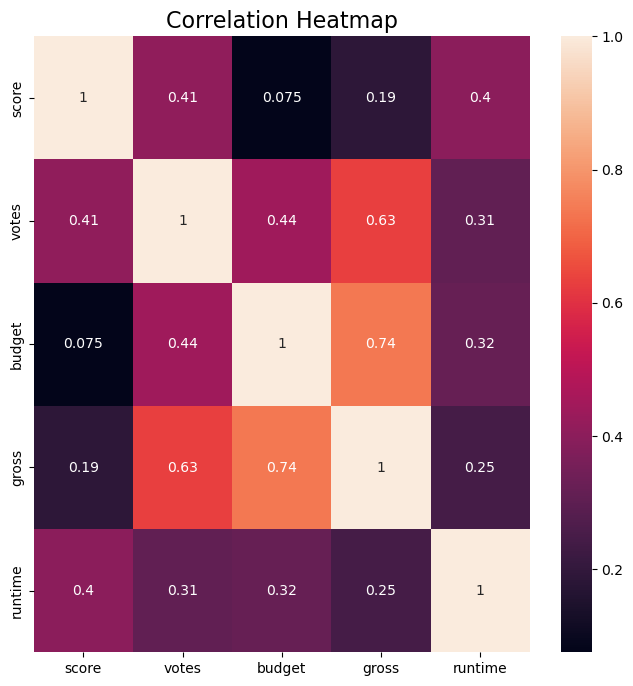

In [10]:
# subplot
f,ax = plt.subplots(figsize=(8,8))

# heatmap to go over subplot above
corr1 = sns.heatmap(sub.corr(), annot = True, ax = ax)
plt.title('Correlation Heatmap', fontsize = 16)

• No negative correlations, which is interesting. 
• There is a strong positive relationship between budget and gross (.74). 'The higher the budget, the higher the gross revenue" might be gleaned from this. 
• A similar relationship exists between votes and gross (.63). The might show that with more gross revenue, more people watch the film, and so more people vote to score it. 
• In that vein, score and runtime have weak correlations with other variables.

In [11]:
#Exporting viz
corr1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'corr_heatmap.png'))

### Scatterplots of intriguing correlations

Text(0.5, 1.0, 'Scatterplot of Budget vs Gross Revenue')

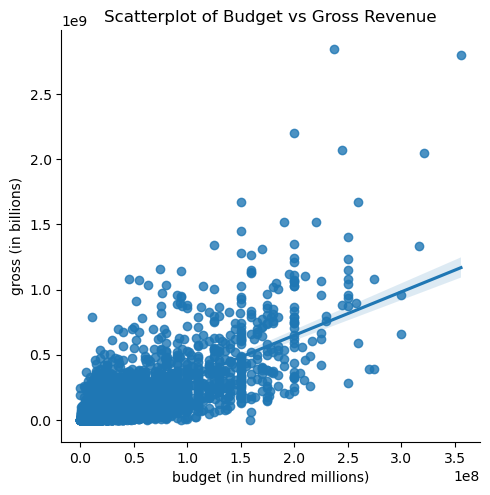

In [12]:
# scatterplot of budget vs gross
scatter1 = sns.lmplot(x = 'budget', y = 'gross', data = df_mov)
plt.ylabel('gross (in billions)')
plt.xlabel('budget (in hundred millions)')
plt.title('Scatterplot of Budget vs Gross Revenue')

The strong positive relationship is clear, but there are also a few large outliers, mainly one around 250 million budget and around 2.8 billion gross, and the other around 350 million budget and around 2.7 billion gross. These two outliers, as well as some others below them, could be skewing the correlation to appear stronger than it is, though the correlation is clearly there and is positive.

In [13]:
#Exporting viz
scatter1.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_budget_gross.png'))

Text(0.5, 1.0, 'Scatterplot of Score Votes vs Gross Revenue')

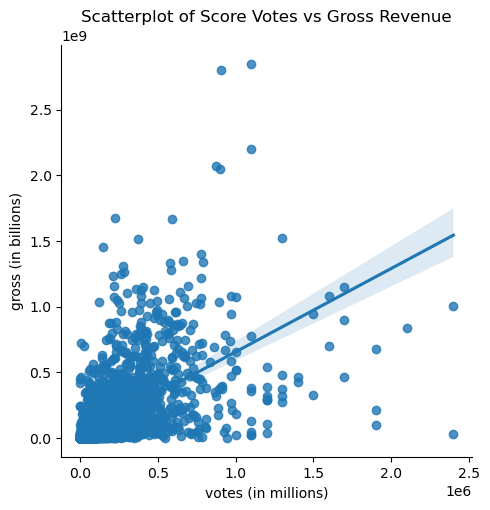

In [14]:
# scatterplot of votes vs gross
scatter2 = sns.lmplot(x = 'votes', y = 'gross', data = df_mov)
plt.ylabel('gross (in billions)')
plt.xlabel('votes (in millions)')
plt.title('Scatterplot of Score Votes vs Gross Revenue')

This correlation is less obvious. There are large outliers on both sides that appear to possibly be skewing the relationship. A couple points have more votes than any other, and yet make below the average in gross revenue supposedly. Then there's the movies that make a lot more revenue average but get fewer votes.

Additionally, these two relationships appear to be very dependent on the large bulk of points at lower value that are more consistent with the trend than the large outliers.

In [15]:
#Exporting viz
scatter2.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'scatter_gross_votes.png'))

### Pair Plot

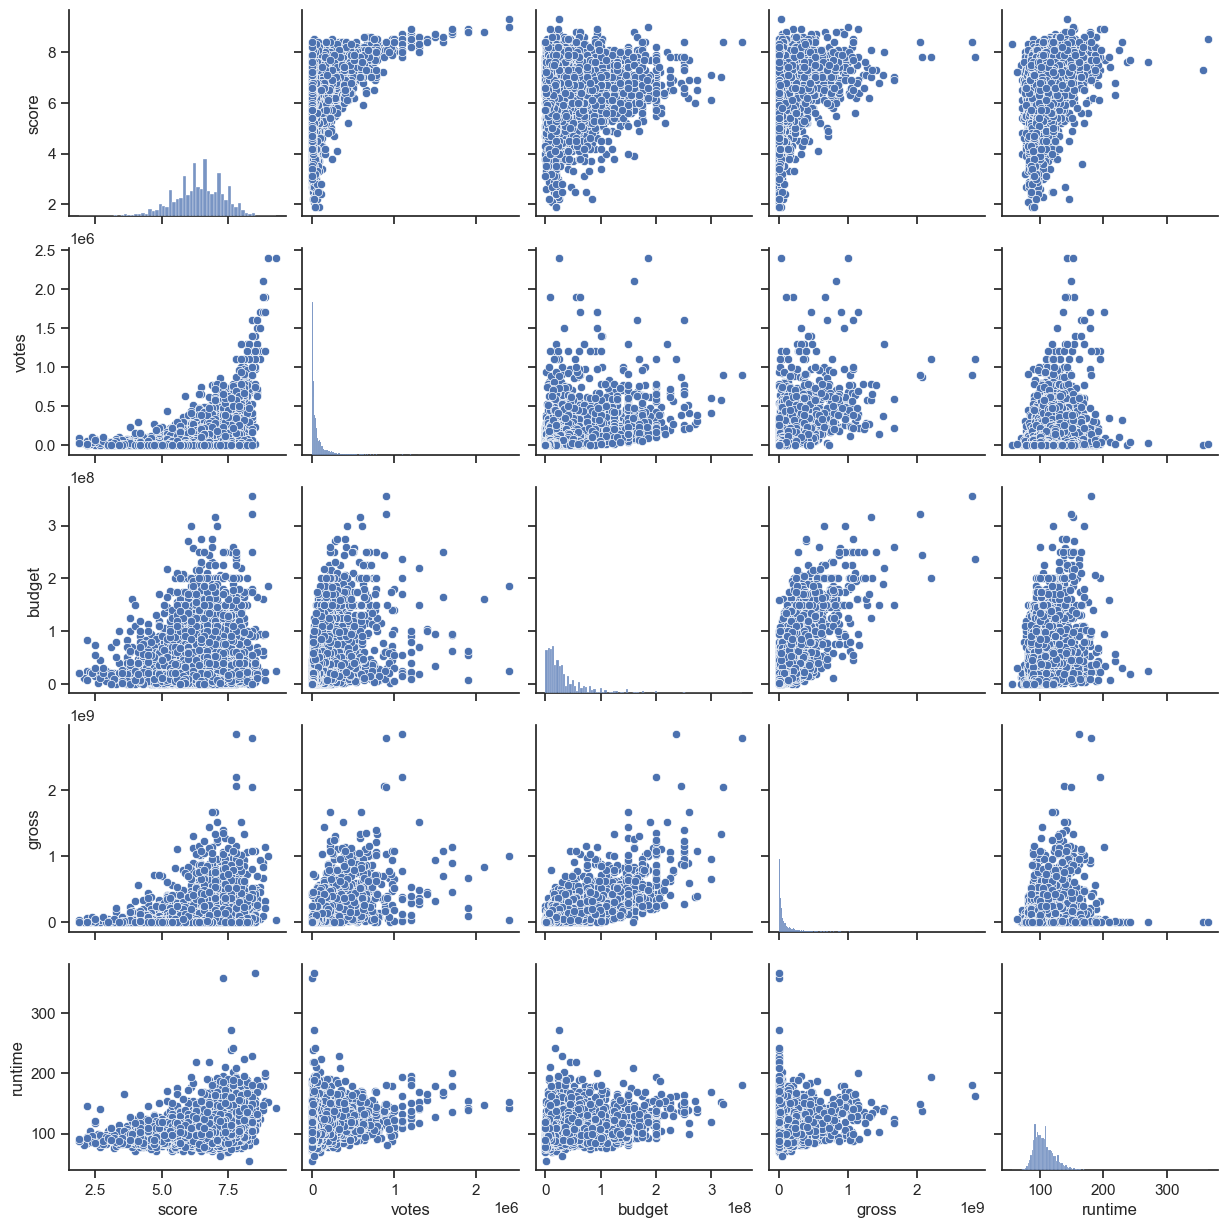

In [25]:
# Pair plot of all variables.
pair = sns.pairplot(sub)

• Score and runtime appear to be interesting histograms to look into, as they seem to be like bell curves on the surface. 
• The correlation between votes and scores is intriguing as the shape of the curve and the orientation of the points suggests a different relationship than the other variables and it seems a correlation calculation might not show this.
• Because of the strong correlation between budget and gross, this relationship should be explored more.

In [17]:
#Exporting viz
pair.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'pair_plot.png'))

### Categorical plot

Text(0.5, 1.0, 'Categroical Breakdown of Budget and Gross Revenue by Rating')

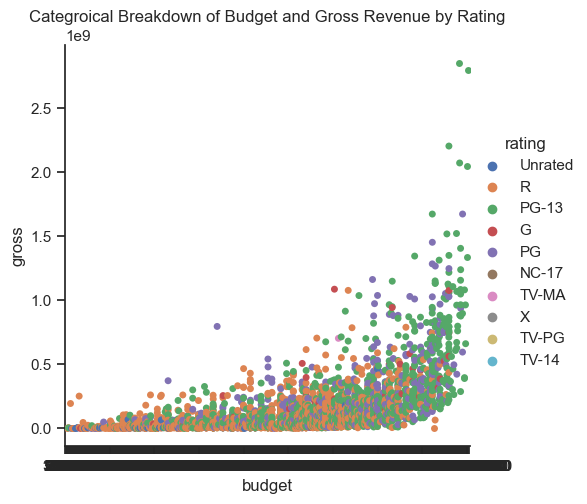

In [21]:
sns.set(style = 'ticks')
catplot = sns.catplot(x = 'budget', y = 'gross', hue = 'rating', data = df_mov)
plt.title('Categroical Breakdown of Budget and Gross Revenue by Rating')

The chart is a little messy, but it can be seen that the 5 highest gross movies are rated PG-13, and even though there are a lot of rated R movies, they are not as high earning as PG-13 or even rated G films.

In [22]:
#Exporting viz
catplot.figure.savefig(os.path.join(path, 'Analysis','Visualizations', 'catplot_budget_gross_rating.png'))

# 4 Questions addressed

#### What is the most profitable rating category?

Appears to be PG-13, though this would need to explored further in a different way.

#### What is the relationship between budget and revenue?

A strong possitive relationship, but it can be explored further. Such as what is the breakdown between country, rating, genre, etc.

#### Is there a positive relationship between score and gross?

Not a strong one between score and gross. However, there is a strong relationship between gross and votes, though it appears to be influenced by outliers. It would be interesting to see what the correlation is without the outliers or how this relationship breaks down between other variables like country, rating, genre, etc

#### Is there a positive relationship between score and votes?

It is positive, but this needs to be explored further, as exploring correlation alone doesn't appear truly enough to show the relationship

# 5 Possible Hypotheses

1. PG-13 is the most profitable rating category.
2. The larger a budget a film has, the higher potential for revenue
3. The most profitable films have relatively low budgets